In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

## 10. This question should be answered using the Carseats data set.

In [4]:
carseats = sm.datasets.get_rdataset('Carseats', 'ISLR')

In [6]:
print(carseats.__doc__)

======== ===============
Carseats R Documentation
======== ===============

Sales of Child Car Seats
------------------------

Description
~~~~~~~~~~~

A simulated data set containing sales of child car seats at 400
different stores.

Usage
~~~~~

::

   Carseats

Format
~~~~~~

A data frame with 400 observations on the following 11 variables.

``Sales``
   Unit sales (in thousands) at each location

``CompPrice``
   Price charged by competitor at each location

``Income``
   Community income level (in thousands of dollars)

``Advertising``
   Local advertising budget for company at each location (in thousands
   of dollars)

``Population``
   Population size in region (in thousands)

``Price``
   Price company charges for car seats at each site

``ShelveLoc``
   A factor with levels ``Bad``, ``Good`` and ``Medium`` indicating the
   quality of the shelving location for the car seats at each site

``Age``
   Average age of the local population

``Education``
   Education level at each 

In [9]:
dcarseats = carseats.data
dcarseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


## (a) Fit a multiple regression model to predict Sales using Price, Urban, and US.

In [27]:
# Linear Regresion Sales v Price, Urban y US

x = dcarseats[['Price','Urban','US']]
x = pd.get_dummies(x, columns=['US', 'Urban'], drop_first = True)
y = dcarseats['Sales'].values.reshape(-1, 1)

X = sm.add_constant(x)
est = sm.OLS(y, X)
resp = est.fit()
print(resp.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Mon, 30 Nov 2020   Prob (F-statistic):           2.39e-23
Time:                        10:15:23   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.0

## (b) Provide an interpretation of each coefficient in the model. Becareful—some of the variables in the model are qualitative!

Price: la data probablemente implique una correlación negativa, mientras menor sea el precio, mayor serán las ventas (esto tiene sentido). 

US: parece tener un efecto de añadidura importante en las ventas, en comparación con zonas rurales por sí sola, ayuda a las ventas si la tienda está dentro de US. 

Urban: parece más bien tener un efecto irrelevante dentro de las ventas. No parece afectar nada.

US_Yes: 1 y Urban_Yes: 0, significa que las ventas aumentan en 1.2 y algo. Es decir, si es en US pero no rural, presentan mejores ventas. 

El contra parte de esto es US_Yes: 0 y Urban_Yes: 1, donde dice que la tienda está en una zona rural fuera de US, donde tiene un impacto negativo pero no tan fuerte.

## (c) Write out the model in equation form, being careful to handle the qualitative variables properly.

Sales = 13.0435 - 0.0545*Price + 1.2006*US_YES - 0.0219*Urban_Yes

Sales = 13.0435 - 0.0545*Price + 1.2006*US_YES -        0

Sales = 13.0435 - 0.0545*Price +      0        - 0.0219*Urban_Yes

Sales = 13.0435 - 0.0545*Price +      0        -        0

## (d) For which of the predictors can you reject the null hypothesis H0 : βj = 0?

Se rechaza la null-hypothesis a US y Price
Urban con p-value = 0.936, 93.6% de que se cumpla la null-hypothesis.

## (e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [15]:
# Linear Regresion Sales v Price, Urban y US

x = dcarseats[['Price','US']]
x = pd.get_dummies(x, columns=['US'], drop_first = True)
y = dcarseats['Sales'].values.reshape(-1, 1)

X = sm.add_constant(x)
est = sm.OLS(y, X)
resp = est.fit()
print(resp.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Mon, 30 Nov 2020   Prob (F-statistic):           2.66e-24
Time:                        09:39:12   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.0

## (f) How well do the models in (a) and (e) fit the data?

El modelo sin la variable Urban mantiene un mismo R2, pero los dos modelos no son suficientes para predecir sales.

## (g) Using the model from (e), obtain 95% confidence intervals for the coefficient(s).

In [20]:
confint = resp.conf_int(alpha = 0.05, cols=None)
confint

,0,1
const,11.763597,14.323341
Price,-0.064764,-0.044154
US_Yes,0.691304,1.709841
Urban_Yes,-0.555973,0.512141


## (h) Is there evidence of outliers or high leverage observations in the model from (e)?

### No hay evidencia de outliers

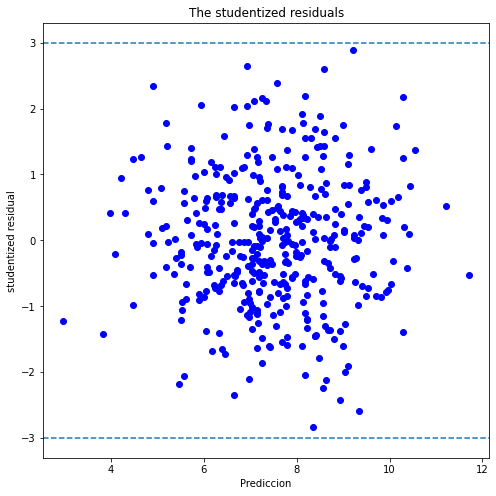

In [34]:
influence = resp.get_influence()  
resid_student = influence.resid_studentized_external

fig, ax = plt.subplots(figsize = (8, 8))
plt.axhline(3, linestyle="--")
plt.axhline(-3, linestyle="--")
x1 = resp.predict();

ax.plot(x1, resid_student, 'bo')
ax.set(title="The studentized residuals",
      xlabel="Prediccion",
      ylabel="studentized residual");

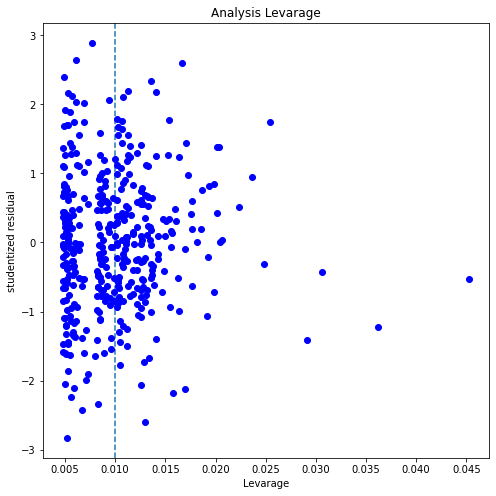

In [32]:

leverage = influence.hat_matrix_diag

fig, ax = plt.subplots(figsize = (8, 8))
plt.axvline(4/400, linestyle="--")

ax.plot(leverage, resid_student, 'bo')
ax.set(title="Analysis Levarage",
      xlabel="Levarage",
      ylabel="studentized residual");

In [30]:
resp.outlier_test()

,student_resid,unadj_p,bonf(p)
0,0.734597,0.463021,1.0
1,0.616595,0.537857,1.0
2,0.079041,0.937040,1.0
3,-0.624312,0.532783,1.0
4,-0.771916,0.440626,1.0
...,...,...,...
395,2.166891,0.030840,1.0
396,-0.637371,0.524252,1.0
397,0.751278,0.452933,1.0
398,-1.262668,0.207453,1.0


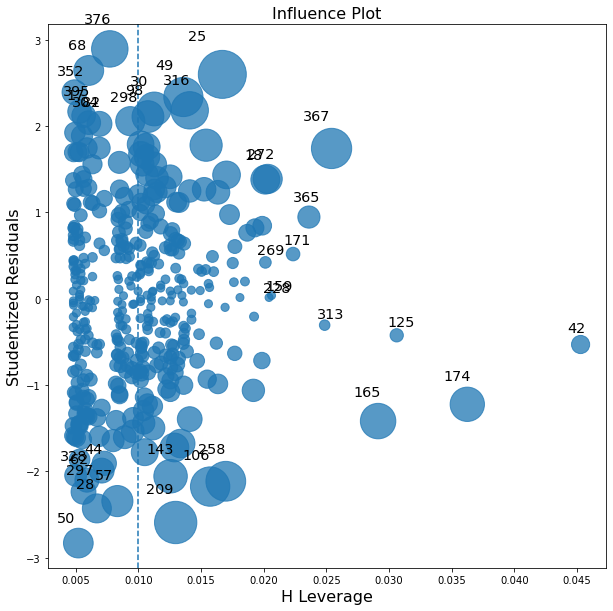

In [59]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.axvline(4/400, linestyle="--");
fig = sm.graphics.influence_plot(resp, ax=ax, criterion="cooks")
